# Segmentation 

This notebook shows how to use Cellpose (generalist algorithm for cellular segmentation) as a part of a segmentation-classification-tracking analysis pipeline. 

The sections of this notebook are as follows:

1. Load images
2. Segment an initial image to test Cellpose parameters
3. Batch segment a sequence of images

The data used in this notebook is timelapse microscopy data with h2b-gfp/rfp markers that show the spatial extent of the nucleus and it's mitotic state. 

This notebook uses the dask octopuslite image loader from the CellX/Lowe lab project.

In [1]:
from octopuslite import DaskOctopusLiteLoader
from cellpose import models, io, plot
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread, imshow, imsave
%matplotlib inline

## 1. Load images

In [2]:
# define experiment ID and select a position
expt = 'ND0022'
pos = 'Pos12'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras/'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
# lazily load images
images = DaskOctopusLiteLoader(image_path, 
                               remove_background = True)
images.channels

[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>,
 <Channels.MASK_C: 93>,
 <Channels.MASK_B: 94>,
 <Channels.MASK_A: 95>,
 <Channels.MASK_IRFP: 96>,
 <Channels.MASK_RFP: 97>,
 <Channels.MASK_GFP: 98>,
 <Channels.MASK_2CH: 99>]

Set segmentation channel and load test image 

In [3]:
# segmentation channel
segmentation_channel = images.channels[1]
# set test image index
frame = 0
# load test image 
img = images[segmentation_channel.name][frame].compute()
img.shape

ch1 = images['gfp'][frame].compute()
ch2 = images['rfp'][frame].compute()
# create 2-channel image
img = np.zeros((ch1.shape[0], ch1.shape[1] ,2), dtype = 'uint8') 
img[:,:,0] = ch1
img[:,:,1] = ch2

/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(


## 2. Load model and test segment single image

In [4]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,None]
# set diameter of segments for cellpose, if set to None then size of cells estimated per image
diameter = None
# Define cellpose model_type='cyto' or model_type='nuclei'
model_type='cyto'
## define model type
model = models.Cellpose(gpu=False, model_type = model_type)

### 2.1 Test run and display initial results

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


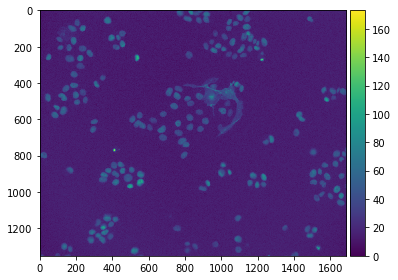

In [5]:
imshow(ch1)

# grayscale single chan

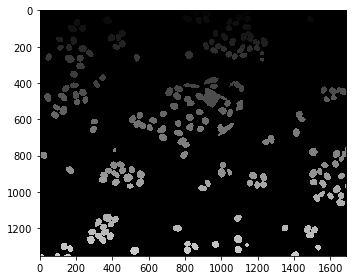

In [6]:
masks, flows, styles, diams = model.eval(ch1, diameter = diameter, channels = channels)
imshow(masks)

# ROI

cant get the roi in the top left corner

In [10]:
ch1_crop = ch1[0:300,0:300]

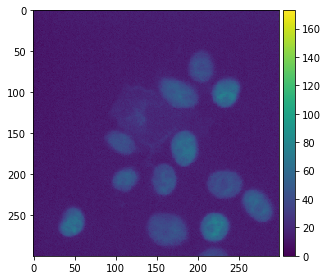

In [11]:
imshow(ch1_crop)

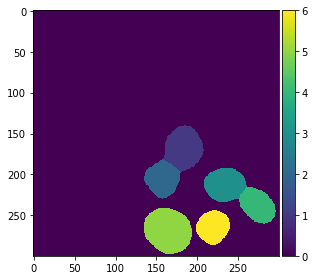

In [19]:
masks, flows, styles, diams = model.eval(ch1_crop, diameter = 120, channels = [0,None])
imshow(masks)

In [24]:
ch1_crop = ch1[200:800,600:1200]

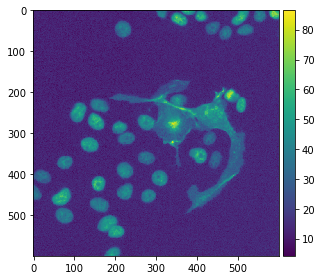

In [25]:
imshow(ch1_crop)

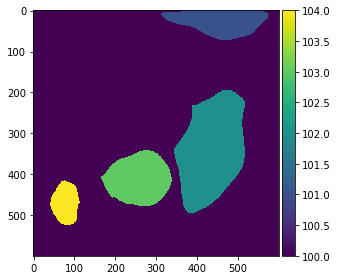

In [31]:
masks, flows, styles, diams = model.eval(ch1_crop, diameter = 200, channels = [0,None])
imshow(masks+100)

### rgb crop 

In [32]:
ch2_crop = ch2[200:800,600:1200]

In [34]:
r = ch2_crop.astype(int)
g = ch1_crop.astype(int)
b = np.zeros(ch1_crop.shape).astype(int)
rgb = np.dstack((r,g,b))

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


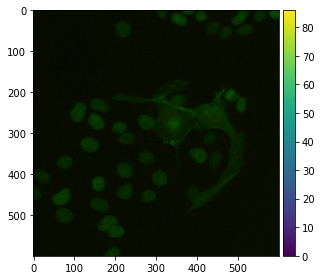

In [37]:
imshow(rgb, )

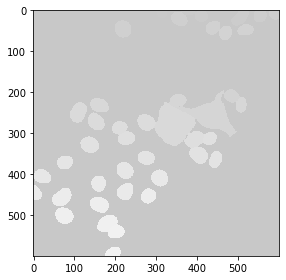

In [40]:
channels = [2,1]
diameter = 50
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
imshow(masks+200)

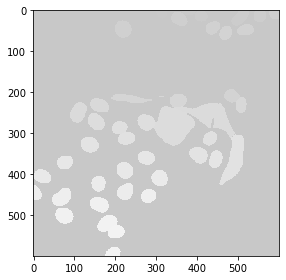

In [41]:
channels = [2,1]
diameter = None
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
imshow(masks+200)

# ND22 Pos12 grayscale into rgb

In [25]:
ch1 = images['gfp'][frame].compute()
ch2 = images['rfp'][frame].compute()

r = ch2.astype(int)
g = ch1.astype(int)
b = np.zeros(ch1.shape).astype(int)

In [26]:
rgb = np.dstack((r,g,b))

In [27]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = None
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
# ## display results
# fig = plt.figure(figsize=(12,5))
# plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
# plt.tight_layout()
# plt.show()

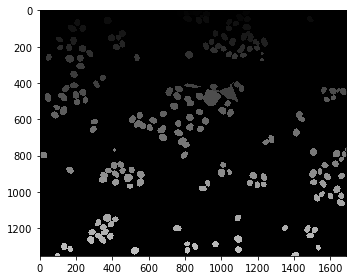

In [28]:
imshow(masks)

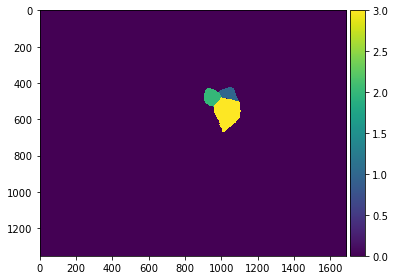

In [31]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 120
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
# fig = plt.figure(figsize=(12,5))
# plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
# plt.tight_layout()
# plt.show()
imshow(masks)

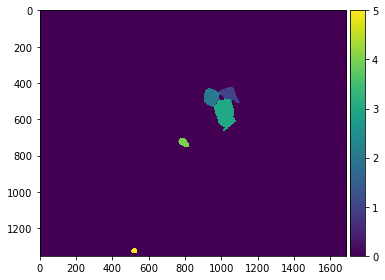

In [32]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 100
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
imshow(masks)

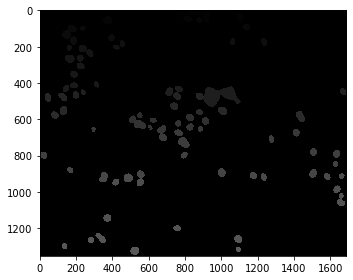

In [33]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 80
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
imshow(masks)

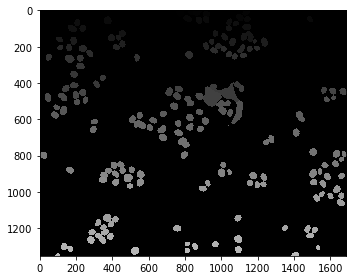

In [34]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 50
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
imshow(masks)

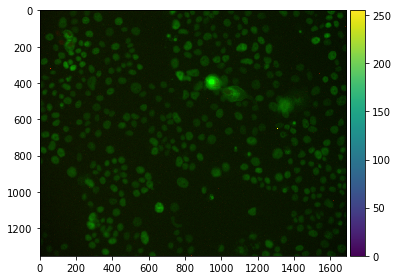

In [97]:
imshow(rgb)

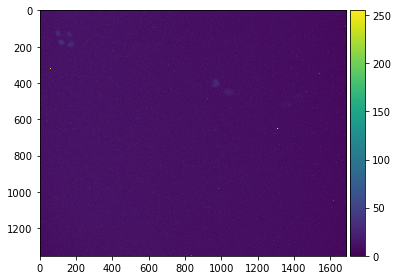

In [23]:
imshow(r)

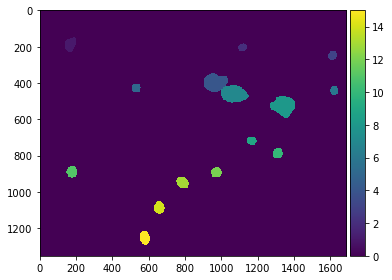

In [99]:
imshow(masks)

# RGB image

2022-03-25 13:25:54,648 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 13:25:58,839 [INFO] >>>> TOTAL TIME 4.19 sec


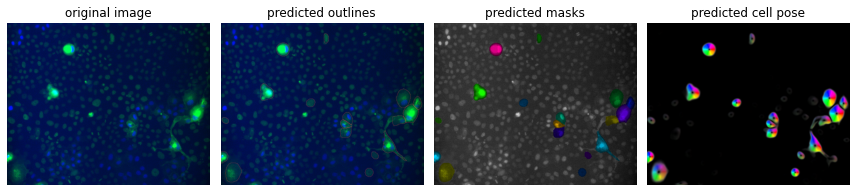

In [68]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,3]
img = io.imread('/home/nathan/cellpose_test.jpg')
diameter = 120
masks, flows, styles, diams = model.eval(img, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=[2,1])
plt.tight_layout()
plt.show()

In [69]:
img.shape

(1352, 1688, 3)

In [71]:
### deconstructing rgb and loading as grayscale 
r = img[...,0]
g = img[...,1]
b = img[...,2]
rgb = np.dstack((r,g,b))

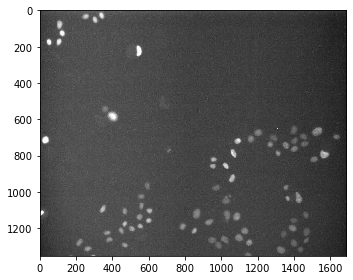

In [77]:
imshow(b)

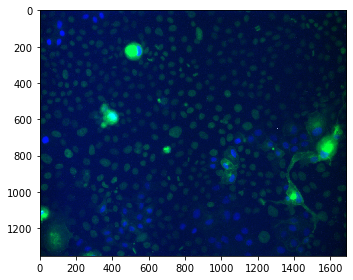

In [78]:
imshow(rgb)

# cyto2

In [105]:
model = models.Cellpose(gpu=False, model_type = 'cyto2')

2022-03-25 13:58:01,727 [INFO] >>>> using CPU


2022-03-25 13:56:05,884 [INFO] ~~~ FINDING MASKS ~~~
2022-03-25 13:56:11,288 [INFO] >>>> TOTAL TIME 5.40 sec


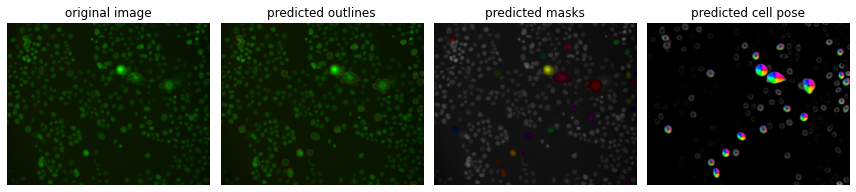

In [102]:
## run cellpose on test image
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 120
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels)
## display results
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, rgb, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


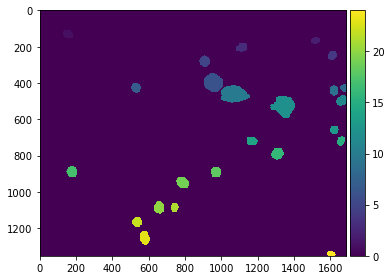

In [103]:
imshow(masks)

# dim image settings

In [40]:
# define experiment ID and select a position
expt = 'ND0013'
pos = 'Pos4'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras/'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
# lazily load images
images = DaskOctopusLiteLoader(image_path, 
                               remove_background = True)
images.channels

[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>,
 <Channels.MASK_GFP: 98>,
 <Channels.MASK: 99>]

In [41]:
irfp = images['irfp'][1000]
gfp = images['gfp'][1000]

/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


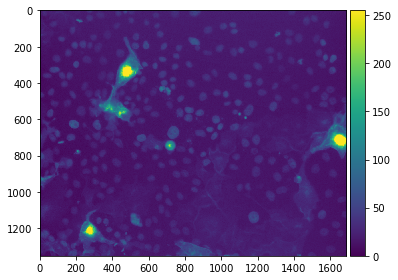

In [42]:
imshow(gfp)

/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(
/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


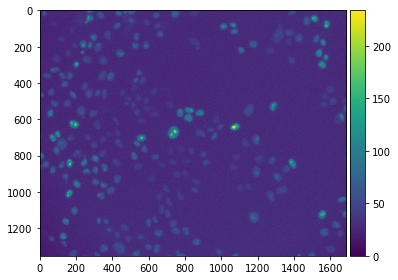

In [43]:
imshow(irfp)

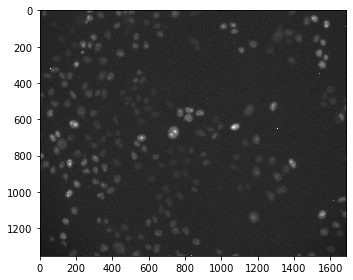

In [39]:
imshow(irfp)

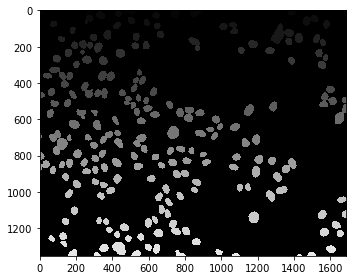

In [44]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [None,0]
diameter = None
masks, flows, styles, diams = model.eval(irfp, diameter = diameter, channels = channels)
## display results
imshow(masks)

/home/nathan/analysis/octopuslite-reader/octopuslite/reader.py:147: UserWarning: Background removal works best on cropped, aligned image. Will fail on uncropped, aligned images due to border effect.
  warnings.warn(


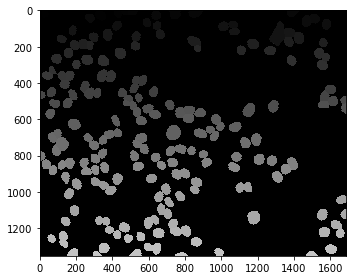

In [45]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [None,0]
diameter = None
masks, flows, styles, diams = model.eval(irfp, diameter = diameter, channels = channels, mask_threshold=-10)
## display results
imshow(masks)

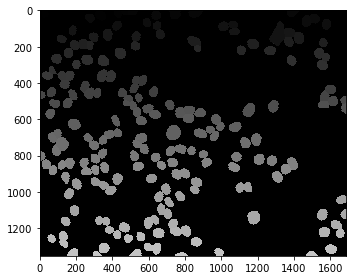

In [46]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [None,0]
diameter = None
masks, flows, styles, diams = model.eval(irfp, diameter = diameter, channels = channels, mask_threshold=-30)
## display results
imshow(masks)

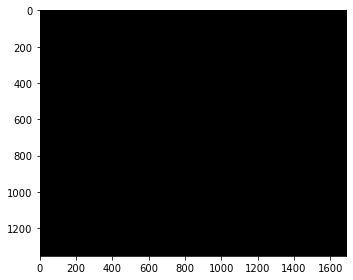

In [51]:
# define channels for cellpose, grayscale=0, R=1, G=2, B=3, channels = [cytoplasm, nucleus]
channels = [2,1]
diameter = 50
masks, flows, styles, diams = model.eval(rgb, diameter = diameter, channels = channels, mask_threshold=10)
## display results
imshow(masks)

## 3. Batch segment a whole stack of images

When you segment a whole data set you do not want to apply any image transformation. This is so that when you load images and masks later on you can apply the same transformation. You can apply a crop but note that you need to be consistent with your use of the crop from this point on, otherwise you'll get a shift. 

In [11]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'cyto')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = ch2.astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=100, channels = [2,1])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel096')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


  0%|          | 0/1106 [00:00<?, ?it/s]

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000000_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000001_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000002_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000003_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000004_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000005_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000052_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000053_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000054_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000055_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000056_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000057_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000104_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000105_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000106_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000107_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000108_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000109_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000156_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000157_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000158_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000159_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000160_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000161_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000208_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000209_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000210_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000211_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000212_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000213_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000260_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000261_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000262_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000263_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000264_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000265_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000312_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000313_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000314_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000315_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000316_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000317_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000364_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000365_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000366_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000367_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000368_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000369_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000416_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000417_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000418_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000419_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000420_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000421_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000468_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000469_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000470_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000471_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000472_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000473_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000520_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000521_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000522_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000523_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000524_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel096_position012_time000000525_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

CPU times: user 11h 7min 3s, sys: 1h 20min 20s, total: 12h 27min 23s
Wall time: 2h 59min 12s


In [12]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'cyto2')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = ch2.astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=100, channels = [2,1])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel095')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


  0%|          | 0/1106 [00:00<?, ?it/s]

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000000_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000001_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000002_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000003_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000004_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000005_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000052_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000053_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000054_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000055_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000056_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000057_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000104_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000105_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000106_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000107_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000108_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000109_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000160_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000163_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000165_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000168_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000170_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000172_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000223_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000224_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000225_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000226_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000227_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel095_position012_time000000228_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

CPU times: user 8h 49min 42s, sys: 1h 8min 54s, total: 9h 58min 36s
Wall time: 2h 44min 17s


In [13]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'nuclei')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = np.zeros(ch1.shape).astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=None, channels = [0,2])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel094')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


  0%|          | 0/1106 [00:00<?, ?it/s]

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000262_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000266_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000267_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000268_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000269_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000270_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000317_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000318_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000319_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000320_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000321_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000322_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000369_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000370_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000371_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000372_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000373_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000374_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000421_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000422_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000423_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000424_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000425_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000426_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000473_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000474_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000475_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000476_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000477_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000478_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000525_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000526_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000527_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000528_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000529_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000530_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000577_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000578_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000579_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000580_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000581_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000582_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000629_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000630_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000631_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000632_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000633_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000634_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000681_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000682_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000683_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000684_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000685_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000686_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000733_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000734_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000735_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000736_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000737_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000738_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000785_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000786_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000787_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000788_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000789_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000790_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000837_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000838_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000839_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000840_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000841_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000842_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000889_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000890_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000891_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000892_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000893_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000894_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000941_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000942_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000943_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000944_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000945_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000946_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000993_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000994_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000995_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000996_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000997_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000000998_z000.tif is a low contrast image
/home/nathan/.local/lib/python3.9/site-package

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001043_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001044_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001045_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001046_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001047_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001048_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001095_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001096_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001097_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001098_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001099_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001100_z000.tif is a low contrast image
<timed exec>:29: UserWarning: /home/nathan/dat

CPU times: user 1d 14h 14min 1s, sys: 6h 53min 54s, total: 1d 21h 7min 56s
Wall time: 9h 23min 47s


<timed exec>:29: UserWarning: /home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel094_position012_time000001105_z000.tif is a low contrast image


In [12]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'nuclei')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('RFP')):
            # load cyto green image
            #ch1 = imread(fn)
            # load red nuclear image
            ch2 = imread(fn)
            #stack into rgb
            r = ch2.astype(int)
            g = np.zeros(ch2.shape).astype(int)
            b = np.zeros(ch2.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(normalize(rgb), diameter=None, channels = [0,1])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel093')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks, check_contrast=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


  0%|          | 0/1098 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
masks, flows, styles, diams = model.eval(normalize(rgb), diameter=30, channels = [0,1])


KeyboardInterrupt: 

In [10]:
from csbdeep.utils import normalize

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


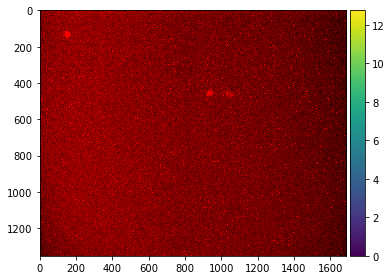

In [11]:
imshow(normalize(rgb))

In [ ]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'cyto2')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            #ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = np.zeros(ch1.shape).astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=130, channels = [1,0])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel092')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks, check_contrast=False)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Starting experiment position: ND0022 Pos12


In [ ]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'cyto2')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            #ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = np.zeros(ch1.shape).astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=100, channels = [1,0])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel091')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks, check_contrast=False)

In [ ]:
%%time
root_dir = '/home/nathan/data/kraken/ras/'

model = models.Cellpose(gpu=False, model_type = 'cyto2')

for expt in tqdm(['ND0022']):#, 'ND0010', 'ND0011'], position = 0, leave = True):
    for pos in tqdm(['Pos12']):
        print('Starting experiment position:', expt, pos)
        # load images
        image_path = os.path.join(root_dir, f'{expt}/{pos}/{pos}_images')
        images = DaskOctopusLiteLoader(image_path, 
                                      remove_background = True)
        # iterate over images filenames 
        for fn in tqdm(images.files('GFP')):
            # load cyto green image
            ch1 = imread(fn)
            # load red nuclear image
            #ch2 = imread(fn.replace('channel001', 'channel002'))
            #stack into rgb
            r = np.zeros(ch1.shape).astype(int)
            g = ch1.astype(int)
            b = np.zeros(ch1.shape).astype(int)
            rgb = np.dstack((r,g,b))
            # predict labels
            masks, flows, styles, diams = model.eval(rgb, diameter=None, channels = [1,1])
            # set filename as mask format (channel099)
            fn = fn.replace(f'channel001', 'channel090')
            # save results as png in cellpose directory
            #io.save_to_png(img, masks, flows, fn)
            imsave(fn, masks, check_contrast=False)